<a href="https://colab.research.google.com/github/ivxsm/KAUST-Learning/blob/main/day4_Logistic_Regression_Pytorch_Breast_Cancer_(Unsolved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install torch
%pip install matplotlib
%pip install scikit-learn

clear_output()

In [3]:
import torch
import torch.nn as nn
from torch.optim import SGD

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Contents:

1. Implementation of Logistic Regression using Pytorch to make a classifier for Breat Cancer Dataset

You need to know:

1. **pytorch** (for impelementation)
2. a little bit of **matplotlib** (for visualization)

## Loading Data

In [4]:
data = load_breast_cancer()

In [5]:
print(data.DESCR)  # description of dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
#Print data
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
print('feature_names:', data.feature_names)
print('-'*20)
print('target_names:', data.target_names)

feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
--------------------
target_names: ['malignant' 'benign']


In [8]:
# Load the Breast Cancer dataset

X = data.data
y = data.target

# Split the dataset into training and testing sets
#ToDo ?????
X_train , X_test , y_train , y_test = train_test_split( X, y , test_size = 0.2 , random_state= 42 , shuffle= True)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

In [9]:
print(f'{X.shape=}')
print(f'{y.shape=}')
print('-'*10)
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print('-'*10)
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

X.shape=(569, 30)
y.shape=(569,)
----------
X_train.shape=torch.Size([455, 30])
X_test.shape=torch.Size([114, 30])
----------
y_train.shape=torch.Size([455])
y_test.shape=torch.Size([114])


In [10]:
#TODO Complete the following class
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()

        # TODO: Initialize a linear layer with input_dim and output size of 1
        self.linear_weights = nn.Linear(input_dim , 1) # TODO
        self.act = nn.Sigmoid() #Hint: Use Activation Function

    def forward(self, x):
        # TODO: Perform a linear transformation followed by a sigmoid activation
        y = self.linear_weights(x) # TODO
        z = self.act(y) # Hint: Use an activation over the linear layer output
        return z

In [20]:
input_dim = 30 # TODO
model = LogisticRegression(input_dim)

# Define loss function and optimizer
#ToDo ????
loss_fn = nn.BCELoss()
rl = 0.01
opt = torch.optim.SGD( model.parameters(), lr = rl)


In [21]:
num_epochs = 20

## Training the model

In [25]:
from operator import mod
train_losses = []

for epoch in range(num_epochs):

  # Forward pass
  #TODO ???
  y_pred = model(X_train)
  y_train = y_train.view(-1,1)
  loss = loss_fn(y_pred , y_train)

  # Backward pass and optimization
  #TODO ???

  opt.zero_grad()
  loss.backward()
  opt.step()
  print(loss.item())

0.7681127786636353
0.7447910904884338
0.7227813005447388
0.7020189762115479
0.6824386715888977
0.6639739871025085
0.6465594172477722
0.6301307082176208
0.6146256327629089
0.5999845862388611
0.5861507654190063
0.5730702877044678
0.5606924295425415
0.5489696264266968
0.5378574132919312
0.5273140668869019
0.5173012018203735
0.5077827572822571
0.4987257719039917
0.4900992512702942


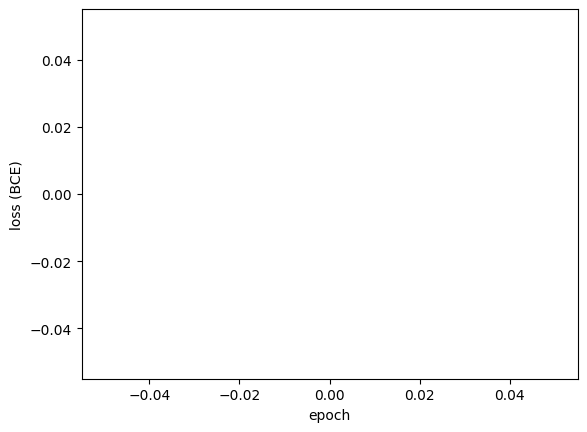

In [26]:
plt.plot(train_losses)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()

In [27]:
model.eval()
with torch.no_grad():

  y_pred = model(X_test)
  y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

  correct = (y_pred == y_test.view(-1, 1)).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 87.72%
